# **Analysis of Netflix Movies and TV Shows**

### by Bhavani Ch

This dataset consists of TV shows and movies available on Netflix as of 2021. The dataset is collected from Kaggle.com. In this notebook we are going to process and analyze the data using Numpy and Pandas libraries,then we will visualize it using matplotlib and seaborn libraries.


## Downloading the Dataset
Let's begin by downloading the data and listing the files within the dataset. Here we are downloading the dataset using opendatasets Python library.

In [47]:
!pip install jovian opendatasets --upgrade --quiet

In [48]:
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows'

In [95]:
import opendatasets as od
od.download(dataset_url,force=True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhvnich
Your Kaggle Key: ········


100%|██████████| 1.34M/1.34M [00:00<00:00, 47.7MB/s]

The dataset has been downloaded and extracted.

In [96]:
data_dir = './netflix-shows'

In [97]:
import os
os.listdir(data_dir)

['netflix_titles.csv']


Let us save and upload our work to Jovian before continuing.

In [98]:
project_name="Netflix_Data_Analysis_Project"

In [99]:
!pip install jovian --upgrade -q

In [100]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>


## We will now import required libraries for data analysis

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib


### Loading the Dataset

Now we are ready to load the dataset. will do this using the standard read_csv() function from Pandas. Let's see the structure of data.

In [57]:
netflix_df=pd.read_csv('./netflix-shows/netflix_titles.csv')

In [58]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Lets just check to confirm that our data is stored as dataframe

In [59]:
type(netflix_df)

pandas.core.frame.DataFrame

#Data Preparation and Cleaning

Familiarize Yourself with the Data
This is a critical step in the data analysis process. The better we understand our data, the better our chances are of producing meaningful analysis.
Now will explore our data in more detail like : 
number of rows and columns peresnt in Dataset, range of values, check and handle missing, incorrect and invalid data and perform some more analysis as per requirment.



using **shape command** to check number of rows and columns 

In [60]:

shape=netflix_df.shape
shape

(8807, 12)

using **info() method** to get the concise summary of the dataframe.

In [61]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In above summary We can see that there are total 8807 rows and 12 columns present in the dataset. the summary also includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis.

if we want to **check first and last few rows** of dataset we can do this by using head() and tail() function

**head()**- returns the first few entries of dataset.

**tail()**- returns the last few entries of dataset.

In [62]:
first_few=netflix_df.head(10)
first_few

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [63]:
last_few = netflix_df.tail(5)
last_few

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Let's see some statistical details of dataset.

using **describe() method** to check some statistical information about the data.

In [64]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


lets find unique values in dataset using **nunique() method**. it exclude NA values by default.

In [65]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Handling Null Values

Let's check if there is any Null value using isnull() method

In [66]:
netflix_df.isnull().values.any()

True

checking total number of null values column wise.

In [67]:

netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

total number of null values in entire dataset.

In [68]:
netflix_df.isnull().sum().sum()

4307

this is the visual representation of null values present in data

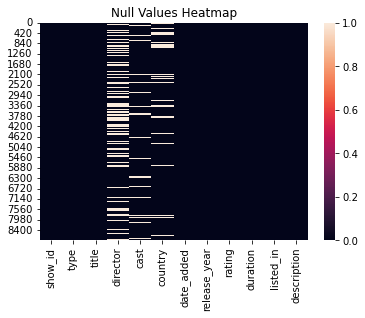

In [69]:
sns.heatmap(netflix_df.isnull())
plt.title('Null Values Heatmap')
plt.show()

Above we can clearly see that there are some null values in the dataset. There are total 4307 null values present in the entire dataset out of which 2634 missing points under 'director', 825 under 'cast', 831 under 'country', 10 under 'date_added', 3 under 'duration' and 4 under 'rating'. 
###so before diving into EDA we first need to handle all these null values.

Creating a copy of dataset so that will not affect our original dataset.


 

In [70]:
netflix_df1=netflix_df.copy()

**Imputation** is a treatment method for missing value by filling it in using certain techniques. Can use mean, mode, or use predictive modeling. In this ,we will discuss the use of the fillna function from Pandas for this imputation.

In [71]:
netflix_df1['director'].fillna('No Director', inplace=True)
netflix_df1['cast'].fillna('No Cast', inplace=True)
netflix_df1['country'].fillna('Country Unavailable', inplace=True)
netflix_df1['duration'].fillna('No Duration', inplace=True)
netflix_df1.dropna(subset=['date_added','rating'],inplace=True)

In [72]:
netflix_df1.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

There are multiple ways to deal with null values but in this we simply replaced all the null values with NA. as the two columns 'date_added' and 'rating' are not going to be part of our analysis so will drop the columns.
and from above we can see that there are no more null values in the dataset.

# Splitting the dataset
As we know that our dataset contain either netflix shows or netflix movies so its better to split our dataset based on these two types. it will be helpful for further analysis.

In [73]:
netflix_movies_df=netflix_df1[netflix_df1['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [74]:
netflix_show_df = netflix_df1[netflix_df1['type']=='TV Show'].copy()
netflix_show_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [75]:
import jovian 

In [76]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhavanichevula9/netflix-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhavanichevula9/netflix-data-analysis-project


'https://jovian.ai/bhavanichevula9/netflix-data-analysis-project'

## Exploratory Analysis and Visualization

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. We'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques.


In this section will try explore our dataset and find some intresting insights with the help of some different graphs and plots.


# Netflix Entertainment type : TV Shows and Movies
Here will explore that which type of content is released by netflix more(i.e TV shows or movies).

In [77]:
netflix_df1['type'].value_counts()

Movie      6129
TV Show    2664
Name: type, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


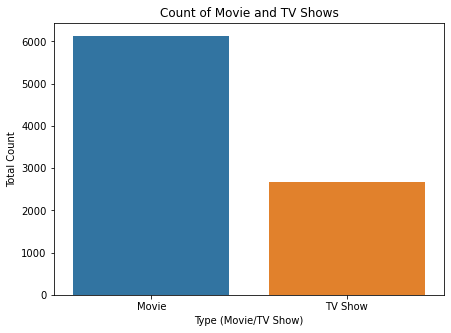

In [78]:
plt.figure(figsize=(7,5))
g=sns.countplot(netflix_df1.type);
plt.title("Count of Movie and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

So from above visualization we can say that there are roughly 6,000+ movies and almost 2,000+ shows with movies being the majority.

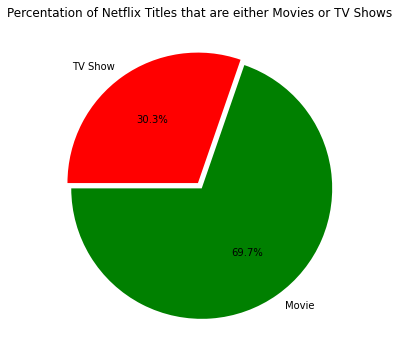

In [79]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df1.type.value_counts(),explode=(0.025,0.025),labels=netflix_df1.type.value_counts().index, colors=['green','red'],autopct='%1.1f%%', startangle=180)
plt.show()

# Most Popular Genres on Netflix

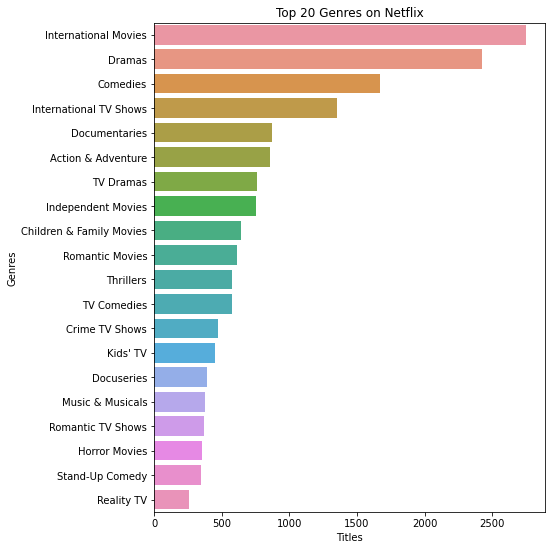

In [80]:
filtered_genres = netflix_df1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the graph, In terms of genres, international movies tops the list comparatively followed by dramas and comedies.The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

# Top Countries contributor on Netflix


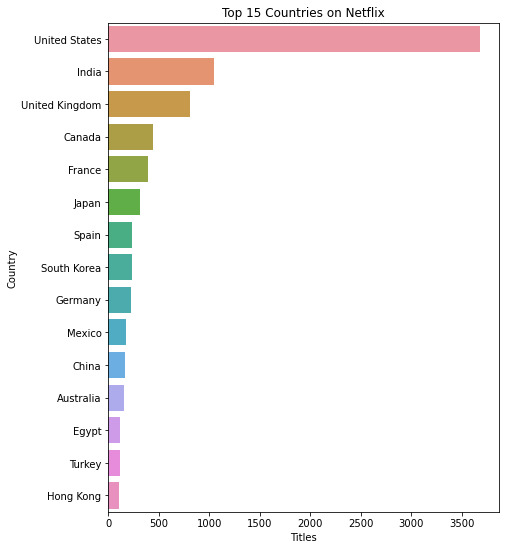

In [81]:
filtered_countries = netflix_df1.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

From the images above, we can see the top 15 countries contributor to Netflix. The country by the amount of the produces content is the United States followed by India.

# Netflix content By Ratings.

Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest.


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


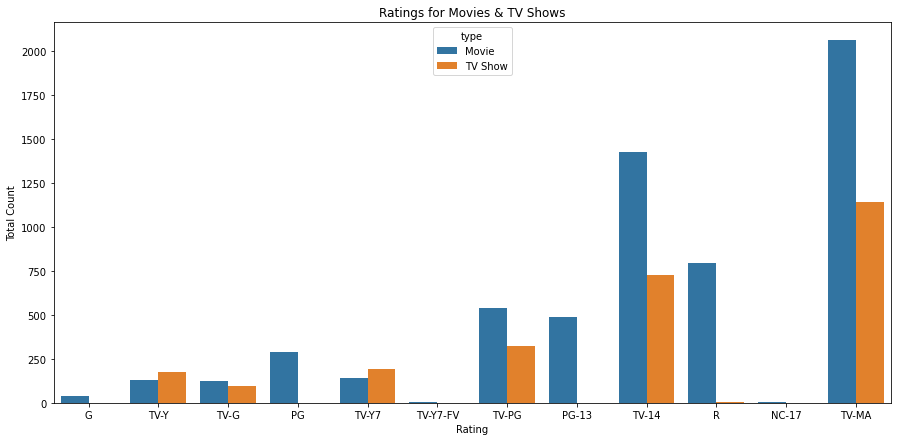

In [82]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_df1.rating, hue=netflix_df1.type, order=order);
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

The  second largest count of Netflix content is made with a “TV-14” rating. “TV-14” contains material that parents or adult guardians may find unsuitable for children under the age of 14. But the largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.

Let us save and upload our work to Jovian before continuing

In [83]:
import jovian

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhavanichevula9/netflix-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhavanichevula9/netflix-data-analysis-project


'https://jovian.ai/bhavanichevula9/netflix-data-analysis-project'

## Asking and Answering Questions

Here will explore some more questions related to our netflix dataset.


### Who are the top 10 Movies actors on Netflix based on number of titles?

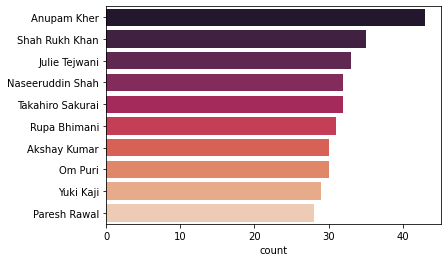

In [85]:
filtered_cast = netflix_df1[netflix_df1.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

### Who are the top 10 TV Shows actors on Netflix based on number of titles?

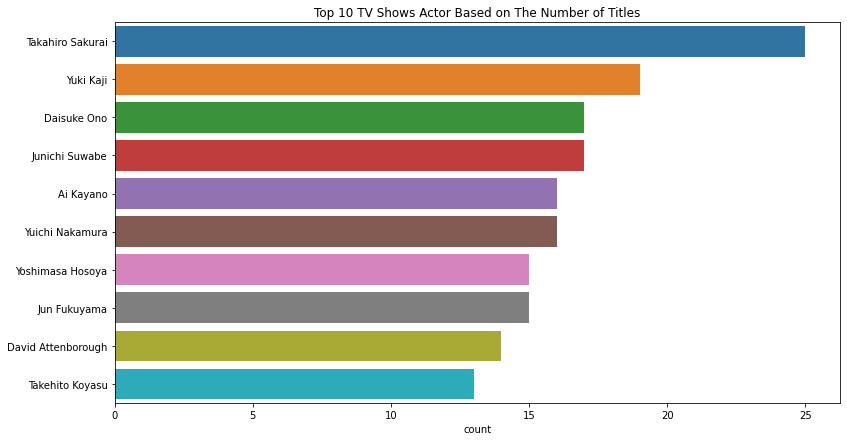

In [86]:
filtered_cast_shows = netflix_show_df[netflix_show_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 TV Shows Actor Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10])
plt.show()

The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai.

### Who are the top 10 directors on Netflix with the most releases?

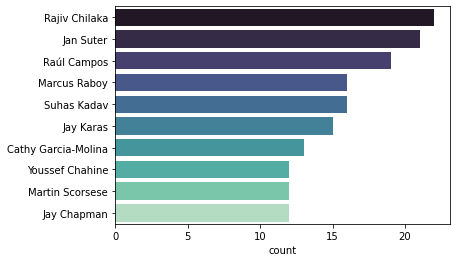

In [87]:
filtered_directors = netflix_df1[netflix_df1.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

The most popular director on Netflix, with the most titles, is Rajiv Chilaka

## Conclusion

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

1. The most content type on Netflix is movies.

2. The country by the amount of the produces content is the United States,

3. The most popular director on Netflix , with the most titles, is Rajiv Chilaka.

4. International Movies is a genre that is mostly in Netflix.

5. largest count of Netflix content is made with a “TV-MA” rating.

6. The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai.

7. The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.

###It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world.

Let us save and upload our work to Jovian before ending the project

In [88]:
import jovian

In [89]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bhavanichevula9/netflix-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/bhavanichevula9/netflix-data-analysis-project


'https://jovian.ai/bhavanichevula9/netflix-data-analysis-project'